In [2]:
import pandas as pd
import pandas as pd
df = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_200919.txt")
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,00:00:00,REGULAR,7457064,2535856
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,04:00:00,REGULAR,7457067,2535861
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,08:00:00,REGULAR,7457078,2535876
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,12:00:00,REGULAR,7457119,2535920
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,12:00:00,RECOVR AUD,26786,4009


In [3]:
df["Date-Time"] = pd.to_datetime(df['DATE']+' '+df['TIME'], format='%m/%d/%Y  %H:%M:%S')

In [4]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date-Time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,00:00:00,REGULAR,7457064,2535856,2020-09-12 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,04:00:00,REGULAR,7457067,2535861,2020-09-12 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,08:00:00,REGULAR,7457078,2535876,2020-09-12 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,12:00:00,REGULAR,7457119,2535920,2020-09-12 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,12:00:00,RECOVR AUD,26786,4009,2020-09-12 12:00:00


In [5]:
df["Turn_Style"] = df["C/A"]+df["UNIT"]+df["SCP"]+df["STATION"]

In [6]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date-Time,Turn_Style
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,00:00:00,REGULAR,7457064,2535856,2020-09-12 00:00:00,A002R05102-00-0059 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,04:00:00,REGULAR,7457067,2535861,2020-09-12 04:00:00,A002R05102-00-0059 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,08:00:00,REGULAR,7457078,2535876,2020-09-12 08:00:00,A002R05102-00-0059 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,12:00:00,REGULAR,7457119,2535920,2020-09-12 12:00:00,A002R05102-00-0059 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,12:00:00,RECOVR AUD,26786,4009,2020-09-12 12:00:00,A002R05102-00-0059 ST


In [7]:
df_sorted = df.sort_values(['Turn_Style', 'Date-Time'])
df_sorted = df.reset_index(drop = True)

turn_style_grouped = df_sorted.groupby(['Turn_Style'])

df_sorted['entries_diff'] = turn_style_grouped['ENTRIES'].transform(pd.Series.diff)
df_sorted['exits_diff'] = turn_style_grouped['EXITS                                                               '].transform(pd.Series.diff)

In [8]:
df_sorted

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date-Time,Turn_Style,entries_diff,exits_diff
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,00:00:00,REGULAR,7457064,2535856,2020-09-12 00:00:00,A002R05102-00-0059 ST,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,04:00:00,REGULAR,7457067,2535861,2020-09-12 04:00:00,A002R05102-00-0059 ST,3.0,5.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,08:00:00,REGULAR,7457078,2535876,2020-09-12 08:00:00,A002R05102-00-0059 ST,11.0,15.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,12:00:00,REGULAR,7457119,2535920,2020-09-12 12:00:00,A002R05102-00-0059 ST,41.0,44.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/12/2020,12:00:00,RECOVR AUD,26786,4009,2020-09-12 12:00:00,A002R05102-00-0059 ST,-7430333.0,-2531911.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209656,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/18/2020,05:00:00,REGULAR,5554,541,2020-09-18 05:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,0.0,0.0
209657,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/18/2020,09:00:00,REGULAR,5554,541,2020-09-18 09:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,0.0,0.0
209658,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/18/2020,13:00:00,REGULAR,5554,541,2020-09-18 13:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,0.0,0.0
209659,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/18/2020,17:00:00,REGULAR,5554,541,2020-09-18 17:00:00,TRAM2R46900-05-01RIT-ROOSEVELT,0.0,0.0


## Clean up missing values and normalize outliers

In [9]:
df_sorted['entries_diff'].describe()

count    2.047070e+05
mean     5.233125e+03
std      2.499815e+06
min     -1.367721e+07
25%      1.000000e+00
50%      1.700000e+01
75%      6.500000e+01
max      1.130282e+09
Name: entries_diff, dtype: float64

In [10]:
df_sorted['exits_diff'].describe()

count    2.047070e+05
mean     2.126527e+03
std      1.076597e+06
min     -1.663366e+07
25%      2.000000e+00
50%      1.800000e+01
75%      6.100000e+01
max      4.864105e+08
Name: exits_diff, dtype: float64

In [11]:
df_sorted['entries_diff'].isnull().sum()

4954

In [12]:
df_sorted['exits_diff'].isnull().sum()

4954

In [13]:
len(df_sorted['exits_diff'][df_sorted['exits_diff'] < 0])

1359

In [14]:
len(df_sorted['entries_diff'][df_sorted['entries_diff'] < 0])

1588

In [15]:
df_sorted.groupby(["Turn_Style","DATE"]).sum()

ENTRIES  \
Turn_Style                     DATE                   
A002R05102-00-0059 ST          09/12/2020  44769699   
                               09/13/2020  44744899   
                               09/14/2020  44746633   
                               09/15/2020  44749315   
                               09/16/2020  44752592   
...                                             ...   
TRAM2R46900-05-01RIT-ROOSEVELT 09/14/2020     33324   
                               09/15/2020     33324   
                               09/16/2020     33324   
                               09/17/2020     33324   
                               09/18/2020     33324   

                                           EXITS                                                                 \
Turn_Style                     DATE                                                                               
A002R05102-00-0059 ST          09/12/2020                                           15219434                      
                               09/13/2020                                           15216052                      
                               09/14/2020                                           15217068                      
                               09/15/2020                                           15218460                      
                               09/16/2020                                           15219888                      
...                                                                                      ...                      
TRAM2R46900-05-01RIT-ROOSEVELT 09/14/2020                                               3246                      
                               09/15/2020                                               3246                      
                               09/16/2020                                               3246                      
                               09/17/2020                                               3246                      
                               09/18/2020                                               3246                      

                                           entries_diff  exits_diff  
Turn_Style                     DATE                                  
A002R05102-00-0059 ST          09/12/2020         291.0       103.0  
                               09/13/2020         287.0       104.0  
                               09/14/2020         379.0       226.0  
                               09/15/2020         539.0       240.0  
                               09/16/2020         555.0       233.0  
...                                                 ...         ...  
TRAM2R46900-05-01RIT-ROOSEVELT 09/14/2020           0.0         0.0  
                               09/15/2020           0.0         0.0  
                               09/16/2020           0.0         0.0  
                               09/17/2020           0.0         0.0  
                               09/18/2020           0.0         0.0  

[34554 rows x 4 columns]

In [16]:
##Filling in extreme values with the mean, Filling in NaN with 0, Negative values with mean

In [17]:
samp=df_sorted
print(samp['entries_diff'].mean())
#209661
#204707
1071257249/204707

5233.124656215958


5233.124656215958

In [18]:
df_sorted['entries_diff'][(df_sorted['entries_diff'] <= 10000) & (df_sorted['entries_diff'] >= 0)].mean()

48.88592500689275

In [19]:
ent_dif_mean=abs(df_sorted['entries_diff'])[abs(df_sorted['entries_diff']) <= 10000].mean()

In [20]:
ext_dif_mean=abs(df_sorted['exits_diff'])[abs(df_sorted['exits_diff']) <= 10000].mean()
ent_dif_mean=abs(df_sorted['entries_diff'])[abs(df_sorted['entries_diff']) <= 10000].mean()
ext_dif_mean

49.48516413987189

In [21]:
df_sorted.iloc[1640:1700]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date-Time,Turn_Style,entries_diff,exits_diff
1640,A011,R080,01-00-04,57 ST-7 AV,NQRW,BMT,09/17/2020,04:00:00,REGULAR,4188454,2904755,2020-09-17 04:00:00,A011R08001-00-0457 ST-7 AV,14.0,1.0
1641,A011,R080,01-00-04,57 ST-7 AV,NQRW,BMT,09/17/2020,08:00:00,REGULAR,4188487,2904941,2020-09-17 08:00:00,A011R08001-00-0457 ST-7 AV,33.0,186.0
1642,A011,R080,01-00-04,57 ST-7 AV,NQRW,BMT,09/17/2020,12:00:00,REGULAR,4188580,2905221,2020-09-17 12:00:00,A011R08001-00-0457 ST-7 AV,93.0,280.0
1643,A011,R080,01-00-04,57 ST-7 AV,NQRW,BMT,09/17/2020,16:00:00,REGULAR,4188753,2905383,2020-09-17 16:00:00,A011R08001-00-0457 ST-7 AV,173.0,162.0
1644,A011,R080,01-00-04,57 ST-7 AV,NQRW,BMT,09/17/2020,20:00:00,REGULAR,4188996,2905538,2020-09-17 20:00:00,A011R08001-00-0457 ST-7 AV,243.0,155.0
1645,A011,R080,01-00-04,57 ST-7 AV,NQRW,BMT,09/18/2020,00:00:00,REGULAR,4189112,2905602,2020-09-18 00:00:00,A011R08001-00-0457 ST-7 AV,116.0,64.0
1646,A011,R080,01-00-04,57 ST-7 AV,NQRW,BMT,09/18/2020,04:00:00,REGULAR,4189123,2905614,2020-09-18 04:00:00,A011R08001-00-0457 ST-7 AV,11.0,12.0
1647,A011,R080,01-00-04,57 ST-7 AV,NQRW,BMT,09/18/2020,08:00:00,REGULAR,4189173,2905801,2020-09-18 08:00:00,A011R08001-00-0457 ST-7 AV,50.0,187.0
1648,A011,R080,01-00-04,57 ST-7 AV,NQRW,BMT,09/18/2020,12:00:00,REGULAR,4189287,2906088,2020-09-18 12:00:00,A011R08001-00-0457 ST-7 AV,114.0,287.0
1649,A011,R080,01-00-04,57 ST-7 AV,NQRW,BMT,09/18/2020,16:00:00,REGULAR,4189523,2906332,2020-09-18 16:00:00,A011R08001-00-0457 ST-7 AV,236.0,244.0


In [22]:
df_sorted['entries_diff'][abs(df_sorted['entries_diff']) >= 262].count()

5297

In [23]:
df_sorted['entries_diff'][df_sorted['entries_diff'] >= 262] = ent_dif_mean
df_sorted['exits_diff'][df_sorted['exits_diff'] >= 262] = ext_dif_mean
df_sorted['entries_diff'][df_sorted['entries_diff'] < 0] = ent_dif_mean
df_sorted['exits_diff'][df_sorted['exits_diff'] < 0] = ext_dif_mean

<ipython-input-23-3812a2e29eae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted['entries_diff'][df_sorted['entries_diff'] >= 262] = ent_dif_mean
<ipython-input-23-3812a2e29eae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted['exits_diff'][df_sorted['exits_diff'] >= 262] = ext_dif_mean
<ipython-input-23-3812a2e29eae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted['entries_diff'][df_sorted['entries_diff'

In [24]:
df_sorted['entries_diff'].describe(percentiles=[.025,.975])

count    204707.000000
mean         41.182297
std          54.447849
min           0.000000
2.5%          0.000000
50%          18.000000
97.5%       201.000000
max         261.000000
Name: entries_diff, dtype: float64

In [25]:
df_sorted['entries_diff'].describe()

count    204707.000000
mean         41.182297
std          54.447849
min           0.000000
25%           1.000000
50%          18.000000
75%          58.000000
max         261.000000
Name: entries_diff, dtype: float64

In [26]:
df_sorted['entries_diff'] = df_sorted['entries_diff'].fillna(0)
df_sorted['exits_diff'] = df_sorted['exits_diff'].fillna(0)

In [27]:
df_sorted['traffic'] = df_sorted['entries_diff'] + df_sorted['exits_diff']

In [28]:
top_stations =df_sorted.groupby(['STATION']).agg({'traffic': sum}).sort_values(by = 'traffic', ascending = False).head(10)

In [29]:
top_stations

,traffic
STATION,
34 ST-PENN STA,371702.804693
86 ST,262062.866533
125 ST,253673.634226
23 ST,249590.615103
FULTON ST,248171.118228
34 ST-HERALD SQ,240784.492156
59 ST,222635.801005
GRD CNTRL-42 ST,218743.442799
14 ST-UNION SQ,208032.508025


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [31]:
plt.bar(top_stations['STATION'], top_stations['traffic'], color='green')
plt.xlabel("STATION")
plt.ylabel("Traffic")
plt.title("Traffic at Top 10 Stations")

KeyError: 'STATION'

In [32]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.bar(,)
plt.show()

SyntaxError: invalid syntax (<ipython-input-32-785fb4e5dc0c>, line 5)

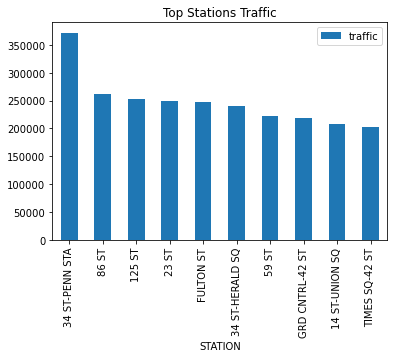

In [33]:
top_stations.plot(title="Top Stations Traffic", kind="bar")
plt.savefig("top_station_traffic.png")

In [34]:
daily_traffic_series = df_sorted.groupby(['DATE','STATION']).sum().reset_index()
#mta_h1busy['date'] = pd.to_datetime(mta_h1busy['date'])

In [35]:
daily_traffic_series['STATION'] == '34 ST-PENN STA'

0       False
1       False
2       False
3       False
4       False
        ...  
2647    False
2648    False
2649    False
2650    False
2651    False
Name: STATION, Length: 2652, dtype: bool

In [36]:
daily_traffic_series[daily_traffic_series['STATION'] == '34 ST-PENN STA']

,DATE,STATION,ENTRIES,EXITS,entries_diff,exits_diff,traffic
61,09/12/2020,34 ST-PENN STA,28432908671,30977638023,16493.824491,21547.247790,38041.072281
440,09/13/2020,34 ST-PENN STA,28385148495,30894554086,16193.510658,19428.307134,35621.817792
819,09/14/2020,34 ST-PENN STA,28426494623,30968171906,29415.276646,28869.010417,58284.287063
1198,09/15/2020,34 ST-PENN STA,28413355423,30948837522,30069.276646,30112.980745,60182.257391
1577,09/16/2020,34 ST-PENN STA,28413557806,30949075712,29426.276646,30275.495581,59701.772227
1956,09/17/2020,34 ST-PENN STA,28413758744,30949315280,29600.590478,30129.951073,59730.541552
2335,09/18/2020,34 ST-PENN STA,28414875120,30949560362,29085.590478,31055.465909,60141.056388


In [37]:
daily_traffic_series['DATE'] = pd.to_datetime(daily_traffic_series['DATE'], format = '%m/%d/%Y')

In [47]:

#pd.to_datetime('07/12/20', format = '%m/%d')
daily_traffic_series.index = daily_traffic_series['DATE']
daily_traffic_series

,DATE,STATION,ENTRIES,EXITS,entries_diff,exits_diff,traffic
DATE,,,,,,,
2020-09-12,2020-09-12,1 AV,2772483587,2822393828,3695.313832,4525.940657,8221.254489
2020-09-12,2020-09-12,103 ST,1845018941,1592481338,5846.000000,5315.940657,11161.940657
2020-09-12,2020-09-12,103 ST-CORONA,377153005,385517713,4919.569162,3783.910985,8703.480146
2020-09-12,2020-09-12,104 ST,10149298200,5939568544,1229.569162,411.000000,1640.569162
2020-09-12,2020-09-12,110 ST,245511646,235357814,2189.000000,2877.000000,5066.000000
...,...,...,...,...,...,...,...
2020-09-18,2020-09-18,WOODHAVEN BLVD,504549165,244473066,7195.824491,6625.881313,13821.705804
2020-09-18,2020-09-18,WOODLAWN,194975570,74999139,2662.313832,1156.000000,3818.313832
2020-09-18,2020-09-18,WTC-CORTLANDT,4425432184,29507342,1741.000000,2008.000000,3749.000000


In [54]:
top_stations

,traffic
STATION,
34 ST-PENN STA,371702.804693
86 ST,262062.866533
125 ST,253673.634226
23 ST,249590.615103
FULTON ST,248171.118228
34 ST-HERALD SQ,240784.492156
59 ST,222635.801005
GRD CNTRL-42 ST,218743.442799
14 ST-UNION SQ,208032.508025


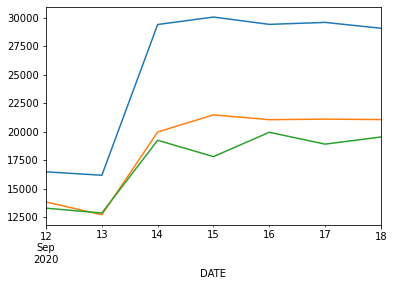

In [83]:
series = daily_traffic_series['entries_diff'][daily_traffic_series['STATION'] == '34 ST-PENN STA']
series1 = daily_traffic_series['entries_diff'][daily_traffic_series['STATION'] == '86 ST']
series2 = daily_traffic_series['entries_diff'][daily_traffic_series['STATION'] == '125 ST']
series3 = daily_traffic_series['entries_diff'][daily_traffic_series['STATION'] == '23 ST']
series4 = daily_traffic_series['entries_diff'][daily_traffic_series['STATION'] == 'FULTON ST']
series5 = daily_traffic_series['entries_diff'][daily_traffic_series['STATION'] == '34 ST-HERALD SQ']
series6 = daily_traffic_series['entries_diff'][daily_traffic_series['STATION'] == '59 ST']
series7 = daily_traffic_series['entries_diff'][daily_traffic_series['STATION'] == 'GRD CNTRL-42 ST']
series8 = daily_traffic_series['entries_diff'][daily_traffic_series['STATION'] == '14 ST-UNION SQ']
series9 = daily_traffic_series['entries_diff'][daily_traffic_series['STATION'] == 'TIMES SQ-42 ST']
series.plot()
series1.plot()
series2.plot()
series3.plot()
series4.plot()
#series5.plot()
#series6.plot()
#series7.plot()
#series8.plot()
#series9.plot()
#legend((series, series1, series2), ('34 ST-PENN STA', '86 ST', '125 ST'))
plt.show()

In [75]:
A = daily_traffic_series['STATION'] == '34 ST-PENN STA'
B = daily_traffic_series['STATION'] == '86 ST'
pd.merge(A,B)
#pd.concat([df1, df4], axis=1).reindex(df1.index)

,STATION
0,False
1,False
2,False
3,False
4,False
...,...
6996069,True
6996070,True
6996071,True
6996072,True


In [3]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [
190105,
190112,
190119,
190126,
190202,
190209,
190216,
190223,
190302,
190309,
190316,
190323,
190330,
190406,
190413,
190420,
190427,
190504,
190511,
190518,
190525,
190601,
190608,
190615,
190622,
190629,
190706,
190713,
190720,
190727,
190803,
190810,
190817,
190824,
190831]
turnstiles_df = get_data(week_nums)

In [4]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [5]:
from datetime import datetime as dt

In [6]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [7]:
#turnstiles_df['DATE_TIME'].dt.minute
index_names = turnstiles_df[ (turnstiles_df['DATE_TIME'].dt.minute != 0) | (turnstiles_df['DATE_TIME'].dt.second != 0)].index

In [8]:
turnstiles_df.drop(index_names, inplace = True)

In [9]:
turnstiles_cleaned = turnstiles_df

In [10]:
turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).ENTRIES.sum()

C/A    UNIT  SCP       STATION        DATE_TIME          
A002   R051  02-00-00  59 ST          2018-12-29 03:00:00    6889287
                                      2018-12-29 07:00:00    6889299
                                      2018-12-29 11:00:00    6889364
                                      2018-12-29 19:00:00    6889966
                                      2018-12-29 23:00:00    6890186
                                                              ...   
TRAM2  R469  00-05-01  RIT-ROOSEVELT  2019-08-30 05:00:00       5554
                                      2019-08-30 09:00:00       5554
                                      2019-08-30 13:00:00       5554
                                      2019-08-30 17:00:00       5554
                                      2019-08-30 21:00:00       5554
Name: ENTRIES, Length: 3476805, dtype: int64

In [11]:
turnstiles_df["Turn_Style"] = turnstiles_df["C/A"]+turnstiles_df["UNIT"]+turnstiles_df["SCP"]+turnstiles_df["STATION"]

In [12]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Turn_Style
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,03:00:00,REGULAR,6889287,2335920,2018-12-29 03:00:00,A002R05102-00-0059 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,07:00:00,REGULAR,6889299,2335936,2018-12-29 07:00:00,A002R05102-00-0059 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,11:00:00,REGULAR,6889364,2336038,2018-12-29 11:00:00,A002R05102-00-0059 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,19:00:00,REGULAR,6889966,2336173,2018-12-29 19:00:00,A002R05102-00-0059 ST
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,23:00:00,REGULAR,6890186,2336219,2018-12-29 23:00:00,A002R05102-00-0059 ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205258,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/30/2019,05:00:00,REGULAR,5554,389,2019-08-30 05:00:00,TRAM2R46900-05-01RIT-ROOSEVELT
205259,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/30/2019,09:00:00,REGULAR,5554,389,2019-08-30 09:00:00,TRAM2R46900-05-01RIT-ROOSEVELT
205260,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/30/2019,13:00:00,REGULAR,5554,389,2019-08-30 13:00:00,TRAM2R46900-05-01RIT-ROOSEVELT
205261,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/30/2019,17:00:00,REGULAR,5554,389,2019-08-30 17:00:00,TRAM2R46900-05-01RIT-ROOSEVELT


In [13]:
turnstiles_df_sorted = turnstiles_df.sort_values(['Turn_Style', 'DATE_TIME'])
turnstiles_df_sorted = turnstiles_df_sorted.reset_index(drop = True)

turn_style_grouped = turnstiles_df_sorted.groupby(['Turn_Style'])

turnstiles_df_sorted['entries_diff'] = turn_style_grouped['ENTRIES'].transform(pd.Series.diff)
turnstiles_df_sorted['exits_diff'] = turn_style_grouped['EXITS'].transform(pd.Series.diff)

In [14]:
turnstiles_df_sorted.describe()

,ENTRIES,EXITS,entries_diff,exits_diff
count,3.476865e+06,3.476865e+06,3.472297e+06,3.472297e+06
mean,4.195752e+07,3.452404e+07,3.196921e+02,-2.320206e+02
std,2.135267e+08,1.968694e+08,5.762334e+06,4.497904e+06
min,0.000000e+00,0.000000e+00,-2.129137e+09,-1.921803e+09
25%,5.631260e+05,2.479640e+05,1.500000e+01,1.200000e+01
50%,2.703855e+06,1.558771e+06,1.020000e+02,7.100000e+01
75%,7.237984e+06,5.179771e+06,3.190000e+02,2.260000e+02
max,2.129552e+09,2.124342e+09,2.088503e+09,2.107590e+09


In [15]:
S = "34 ST-PENN STA"
mask = turnstiles_df_sorted['STATION'] == S
tds_S = turnstiles_df_sorted[mask]

In [16]:
turnstiles_df_sorted['entries_diff'] = abs(turnstiles_df_sorted['entries_diff'])
turnstiles_df_sorted['exits_diff'] = abs(turnstiles_df_sorted['exits_diff'])

In [17]:
high = tds_S['entries_diff'].quantile(q=.50) + 1.5 * (tds_S['entries_diff'].quantile(q=.75) - turnstiles_df_sorted['entries_diff'].quantile(q=.25))
low  = turnstiles_df_sorted['entries_diff'].quantile(q=.50) - 1.5 * (turnstiles_df_sorted['entries_diff'].quantile(q=.75) - turnstiles_df_sorted['entries_diff'].quantile(q=.25))

In [19]:
high = turnstiles_df_sorted['entries_diff'].quantile(q=.50) + 1.5 * (turnstiles_df_sorted['entries_diff'].quantile(q=.75) - turnstiles_df_sorted['entries_diff'].quantile(q=.25))
low  = turnstiles_df_sorted['entries_diff'].quantile(q=.50) - 1.5 * (turnstiles_df_sorted['entries_diff'].quantile(q=.75) - turnstiles_df_sorted['entries_diff'].quantile(q=.25))

In [21]:
ext_dif_mean = abs(turnstiles_df_sorted['exits_diff'])[abs(turnstiles_df_sorted['exits_diff']) <=10000].mean()
ent_dif_mean = abs(turnstiles_df_sorted['entries_diff'])[abs(turnstiles_df_sorted['entries_diff']) <= 10000].mean()

In [22]:
import seaborn as sns
sns.set()

In [23]:
stations_daily = (turnstiles_df_sorted.groupby(['STATION','DATE'])['entries_diff'].sum().reset_index())

stations_daily.head()

,STATION,DATE,entries_diff
0,1 AV,01/01/2019,10508.0
1,1 AV,01/02/2019,25371.0
2,1 AV,01/03/2019,19525.0
3,1 AV,01/04/2019,19687.0
4,1 AV,01/05/2019,12854.0


In [24]:
top10_stations = \
    (stations_daily.groupby(['STATION'])['entries_diff'].sum()
                   .reset_index()
                   .sort_values(by='entries_diff',ascending=False) 
                   .STATION.head(10))

top10_stations

81       57 ST-7 AV
52      3 AV-149 ST
9            125 ST
1            103 ST
88    66 ST-LINCOLN
32           183 ST
51      3 AV 138 ST
13            14 ST
6            116 ST
94            72 ST
Name: STATION, dtype: object

In [25]:
stations_daily_top10 = stations_daily[stations_daily['STATION'].isin(top10_stations)]

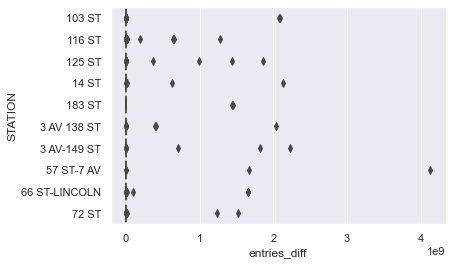

In [29]:
sns.boxplot('entries_diff', 'STATION', data=stations_daily_top10)

In [27]:
turnstiles_df_sorted['entries_diff'].describe()

count    3.472297e+06
mean     2.516144e+04
std      5.762279e+06
min      0.000000e+00
25%      1.600000e+01
50%      1.050000e+02
75%      3.250000e+02
max      2.129137e+09
Name: entries_diff, dtype: float64

In [28]:
turnstiles_df_sorted['entries_diff'][turnstiles_df_sorted['entries_diff'] >= high] = ent_dif_mean
turnstiles_df_sorted['exits_diff'][turnstiles_df_sorted['exits_diff'] >= high] = ext_dif_mean
turnstiles_df_sorted['entries_diff'][turnstiles_df_sorted['entries_diff'] < 0] = ent_dif_mean
turnstiles_df_sorted['exits_diff'][turnstiles_df_sorted['exits_diff'] < 0] = ext_dif_mean

<ipython-input-28-730d9d1c7cd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnstiles_df_sorted['entries_diff'][turnstiles_df_sorted['entries_diff'] >= high] = ent_dif_mean
<ipython-input-28-730d9d1c7cd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnstiles_df_sorted['exits_diff'][turnstiles_df_sorted['exits_diff'] >= high] = ext_dif_mean
<ipython-input-28-730d9d1c7cd3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turn

In [30]:
top_stations = turnstiles_df_sorted.groupby(['STATION']).agg({'entries_diff': sum}).sort_values(by = 'entries_diff', ascending = False).head(10)

In [31]:
top_stations

,entries_diff
STATION,
34 ST-PENN STA,1.331624e+07
23 ST,1.035428e+07
FULTON ST,9.155804e+06
42 ST-PORT AUTH,8.306425e+06
34 ST-HERALD SQ,8.057599e+06
GRD CNTRL-42 ST,7.906379e+06
TIMES SQ-42 ST,7.680218e+06
CANAL ST,7.034920e+06
14 ST-UNION SQ,6.774256e+06


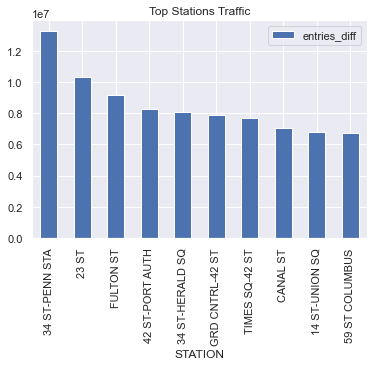

In [35]:
top_stations.plot(title="Top Stations Traffic", kind="bar")
plt.savefig("top_station_traffic.png")

In [36]:
daily_traffic_series = turnstiles_df_sorted.groupby(['DATE','STATION']).sum().reset_index()

In [37]:
daily_traffic_series['DATE'] = pd.to_datetime(daily_traffic_series['DATE'], format = '%m/%d/%Y')

In [38]:
daily_traffic_series.columns

Index(['DATE', 'STATION', 'ENTRIES', 'EXITS', 'entries_diff', 'exits_diff'], dtype='object')

In [39]:
turnstiles_df_sorted['TIME'] = pd.to_datetime(turnstiles_df_sorted['TIME'], format = '%H:%M:%S')

In [40]:
turnstiles_df_sorted_group = turnstiles_df_sorted.groupby(['STATION','DATE','TIME'])
turnstiles_df_sorted_group = turnstiles_df_sorted_group['entries_diff'].mean().reset_index()

turnstiles_df_sorted_group

,STATION,DATE,TIME,entries_diff
0,1 AV,01/01/2019,1900-01-01 03:00:00,206.500000
1,1 AV,01/01/2019,1900-01-01 07:00:00,72.333333
2,1 AV,01/01/2019,1900-01-01 11:00:00,131.000000
3,1 AV,01/01/2019,1900-01-01 15:00:00,160.979985
4,1 AV,01/01/2019,1900-01-01 19:00:00,165.979985
...,...,...,...,...
507213,ZEREGA AV,12/31/2018,1900-01-01 04:00:00,3.400000
507214,ZEREGA AV,12/31/2018,1900-01-01 08:00:00,78.600000
507215,ZEREGA AV,12/31/2018,1900-01-01 12:00:00,74.400000
507216,ZEREGA AV,12/31/2018,1900-01-01 16:00:00,55.000000


In [41]:
station_of_interest = '23 ST'
mta_penn = turnstiles_df_sorted[turnstiles_df_sorted['STATION'] == station_of_interest]
time_interval = '4H'

mta_penn.head()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Turn_Style,entries_diff,exits_diff
2398,A030,R083,01-00-00,23 ST,NRW,BMT,12/29/2018,1900-01-01 03:00:00,REGULAR,6987977,4493132,2018-12-29 03:00:00,A030R08301-00-0023 ST,NaN,NaN
2399,A030,R083,01-00-00,23 ST,NRW,BMT,12/29/2018,1900-01-01 07:00:00,REGULAR,6987987,4493147,2018-12-29 07:00:00,A030R08301-00-0023 ST,10.0,15.0
2400,A030,R083,01-00-00,23 ST,NRW,BMT,12/29/2018,1900-01-01 11:00:00,REGULAR,6988049,4493311,2018-12-29 11:00:00,A030R08301-00-0023 ST,62.0,164.0
2401,A030,R083,01-00-00,23 ST,NRW,BMT,12/29/2018,1900-01-01 15:00:00,REGULAR,6988347,4493538,2018-12-29 15:00:00,A030R08301-00-0023 ST,298.0,227.0
2402,A030,R083,01-00-00,23 ST,NRW,BMT,12/29/2018,1900-01-01 19:00:00,REGULAR,6988821,4493781,2018-12-29 19:00:00,A030R08301-00-0023 ST,474.0,243.0


In [42]:
stations_day_time = mta_penn[['STATION', 'DATE_TIME', 'entries_diff','exits_diff']]
stations_day_time_group = stations_day_time.groupby(['STATION','DATE_TIME'], as_index=False)
stations_day_time = stations_day_time_group[['entries_diff', 'exits_diff']].sum()
rounded_day_time = stations_day_time.set_index('DATE_TIME').groupby(['STATION'])
rounded_day_time = rounded_day_time.resample(time_interval, convention='end').sum()

print ('Station of interest: ' + station_of_interest)
print ('Sample size before resampling:')
print (len(stations_day_time[stations_day_time.STATION == station_of_interest]))
print ('Sample size after resampling:')
print (len(rounded_day_time.loc[station_of_interest]))
rounded_day_time = rounded_day_time.reset_index()

Station of interest: 23 ST
Sample size before resampling:
2939
Sample size after resampling:
1470


In [43]:
stations_day_time['DAY'] = stations_day_time['DATE_TIME'].dt.dayofweek
stations_day_time['TIME'] = stations_day_time['DATE_TIME'].dt.time

In [44]:
stations_day_time_group = stations_day_time.groupby(['STATION','DAY','TIME'])
stations_day_time_group = stations_day_time_group['entries_diff'].mean().reset_index()

In [45]:
stations_day_time_group

,STATION,DAY,TIME,entries_diff
0,23 ST,0,00:00:00,3429.287897
1,23 ST,0,01:00:00,1479.844715
2,23 ST,0,03:00:00,1717.267903
3,23 ST,0,04:00:00,1294.315345
4,23 ST,0,05:00:00,776.988733
...,...,...,...,...
121,23 ST,6,17:00:00,2251.771091
122,23 ST,6,19:00:00,6101.803709
123,23 ST,6,20:00:00,5521.039735
124,23 ST,6,21:00:00,1736.606287


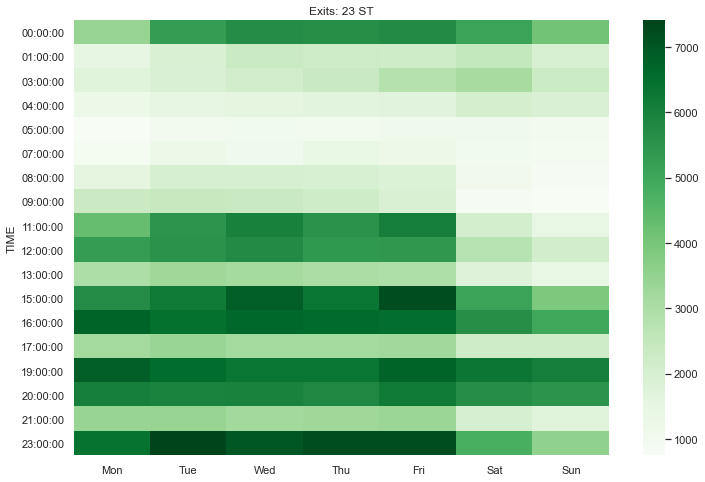

In [46]:
draw_station = stations_day_time_group

station_heatmap = draw_station.set_index(['DAY', 'TIME']).entries_diff.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set(title='Exits: ' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax, cmap='Greens')
plt.show()

In [47]:
daily_traffic_series.index = daily_traffic_series['DATE']
daily_traffic_series

,DATE,STATION,ENTRIES,EXITS,entries_diff,exits_diff
DATE,,,,,,
2019-01-01,2019-01-01,1 AV,6877050377,4080190300,4198.759824,5188.167632
2019-01-01,2019-01-01,103 ST,489683053,1781024948,9847.919206,6701.001159
2019-01-01,2019-01-01,103 ST-CORONA,323026580,329852947,7596.639735,6491.500579
2019-01-01,2019-01-01,104 ST,25709410824,19193143845,1185.000000,785.000000
2019-01-01,2019-01-01,110 ST,67570750,94328928,2530.519647,2847.500579
...,...,...,...,...,...,...
2018-12-31,2018-12-31,WINTHROP ST,86505855,14252473,1747.519647,778.000000
2018-12-31,2018-12-31,WOODHAVEN BLVD,433584449,158480774,9140.558941,6890.001159
2018-12-31,2018-12-31,WORLD TRADE CTR,7964164599,9188586793,11258.759824,9592.500579


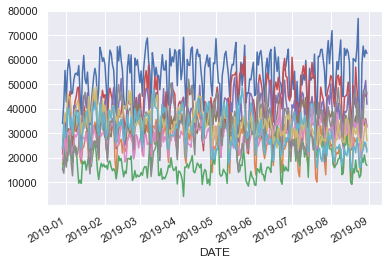

In [48]:
series = daily_traffic_series['entries_diff'][daily_traffic_series['STATION'] == '34 ST-PENN STA']
series1 = daily_traffic_series['entries_diff'][daily_traffic_series['STATION'] == '86 ST']
series2 = daily_traffic_series['entries_diff'][daily_traffic_series['STATION'] == '125 ST']
series3 = daily_traffic_series['entries_diff'][daily_traffic_series['STATION'] == '23 ST']
series4 = daily_traffic_series['entries_diff'][daily_traffic_series['STATION'] == 'FULTON ST']
series5 = daily_traffic_series['entries_diff'][daily_traffic_series['STATION'] == '34 ST-HERALD SQ']
series6 = daily_traffic_series['entries_diff'][daily_traffic_series['STATION'] == 'CANAL ST']
series7 = daily_traffic_series['entries_diff'][daily_traffic_series['STATION'] == 'GRD CNTRL-42 ST']
series8 = daily_traffic_series['entries_diff'][daily_traffic_series['STATION'] == '42 ST-PORT AUTH']
series9 = daily_traffic_series['entries_diff'][daily_traffic_series['STATION'] == 'TIMES SQ-42 ST']
series.plot()
series1.plot()
series2.plot()
series3.plot()
series4.plot()
series5.plot()
series6.plot()
series7.plot()
series8.plot()
series9.plot()
#legend((series, series1, series2), ('34 ST-PENN STA', '86 ST', '125 ST'))
plt.show()